In [1]:
!pip3 install git+https://github.com/albumentations-team/albumentations.git
!git clone https://github.com/aditdoshi333/module_files_cv

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-1ocxotip
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-1ocxotip
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98531 sha256=7989daa3829a0a4b7e6f4559019520b36629fb65a464df182da3658091659e53
  Stored in directory: /tmp/pip-ephem-wheel-cache-3oiikyks/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
Cloning into 'module_files_cv'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 10), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [2]:
import sys
import os
util_files = '/content/module_files_cv/'
sys.path.append(os.path.abspath(util_files))

In [3]:
from utils.generic_func import get_data_set, plot_graph
from main  import get_data_loader, get_model, set_model_train_config, training_loop
from utils.gradcam import grad_cam_plot
from utils.missclassified_images import misclassified_images

In [4]:
train_set, test_set = get_data_set("cifar", ["totensor", "normalize", "randomcrop", "horizontal_flip", "cutout", "random_rotate"])
train_loader, test_loader = get_data_loader(train_set, test_set)


Extracting /cifar-10-python.tar.gz to /
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [5]:
EPOCHS = 40

resnet_model = get_model(norm_type="LayerNorm",model_name="resnet_18")
device, target_classes, resnet_model, criterion, optimizer, scheduler = set_model_train_config(resnet_model, loss="cross_entropy", optimizer="SGD", lr=0.1 )
train_loss, train_acc, test_loss, test_acc = training_loop(EPOCHS, resnet_model, criterion, optimizer, device, train_loader, test_loader, scheduler)

EPOCH : 0



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Loss: 2.695 | Train Acc: 15.220% (7610/50000)
Test Loss: 2.185 | Test Acc: 17.880% (1788/10000)
EPOCH : 1

Train Loss: 2.130 | Train Acc: 21.318% (10659/50000)
Test Loss: 1.986 | Test Acc: 26.580% (2658/10000)
EPOCH : 2

Train Loss: 1.923 | Train Acc: 28.814% (14407/50000)
Test Loss: 1.838 | Test Acc: 29.750% (2975/10000)
EPOCH : 3

Train Loss: 1.782 | Train Acc: 34.448% (17224/50000)
Test Loss: 1.696 | Test Acc: 37.520% (3752/10000)
EPOCH : 4

Train Loss: 1.668 | Train Acc: 38.242% (19121/50000)
Test Loss: 1.542 | Test Acc: 43.130% (4313/10000)
EPOCH : 5

Train Loss: 1.593 | Train Acc: 41.488% (20744/50000)
Test Loss: 1.512 | Test Acc: 43.680% (4368/10000)
EPOCH : 6

Train Loss: 1.519 | Train Acc: 44.376% (22188/50000)
Test Loss: 1.477 | Test Acc: 46.560% (4656/10000)
EPOCH : 7

Train Loss: 1.450 | Train Acc: 46.744% (23372/50000)
Test Loss: 1.260 | Test Acc: 53.590% (5359/10000)
EPOCH : 8

Train Loss: 1.370 | Train Acc: 49.846% (24923/50000)
Test Loss: 1.248 | Test Acc: 55.530%

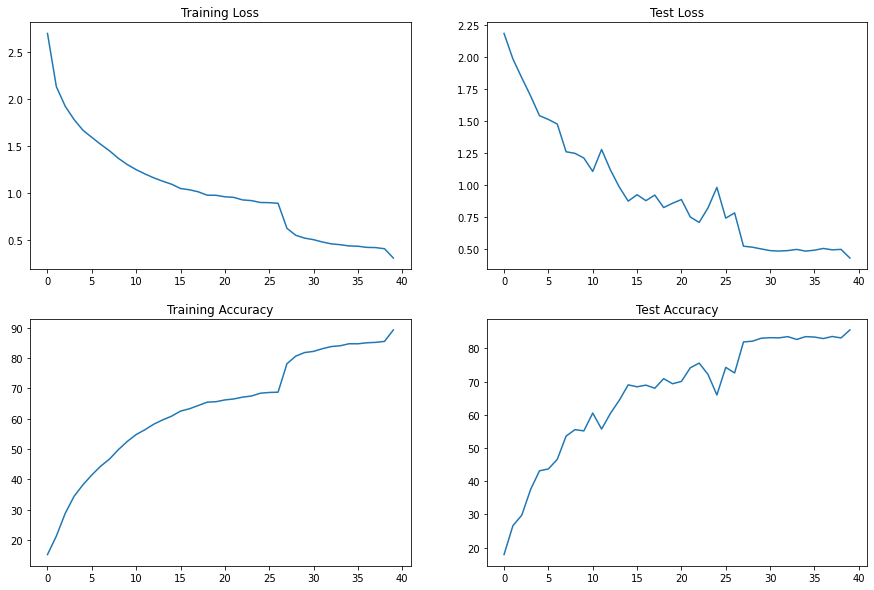

In [6]:
plot_graph(train_loss, train_acc, test_loss, test_acc)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

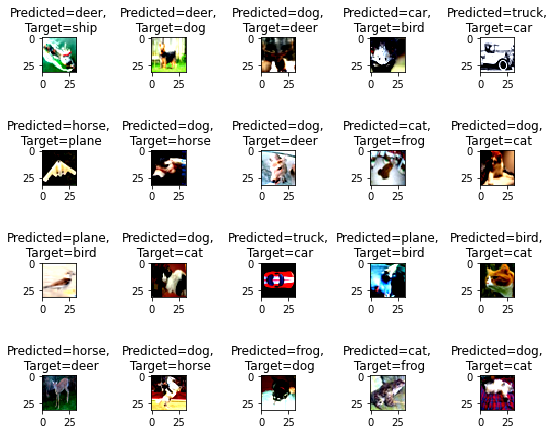

In [7]:
list_of_misclassified_images = misclassified_images(resnet_model, device, test_loader, target_classes)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3487: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255

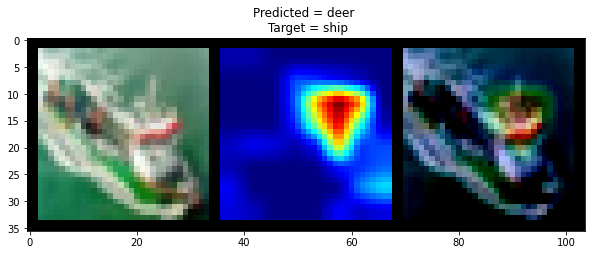

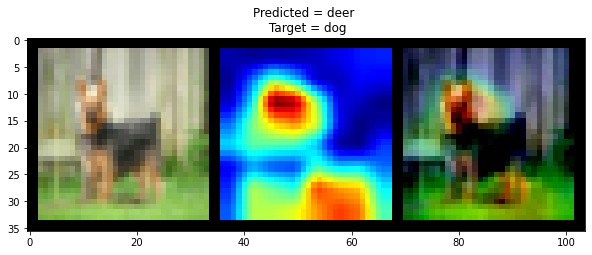

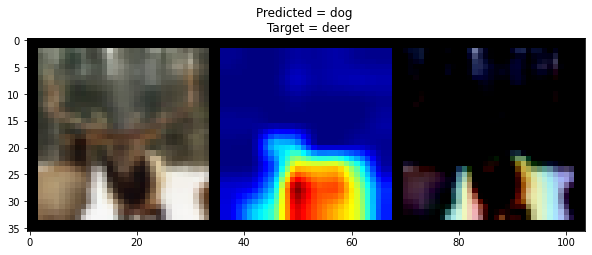

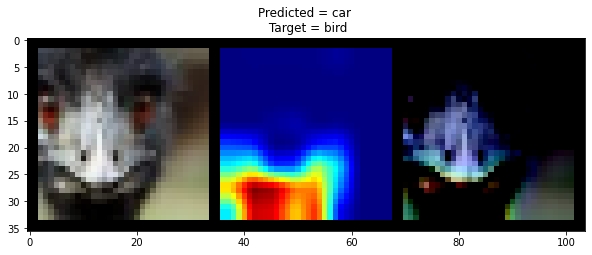

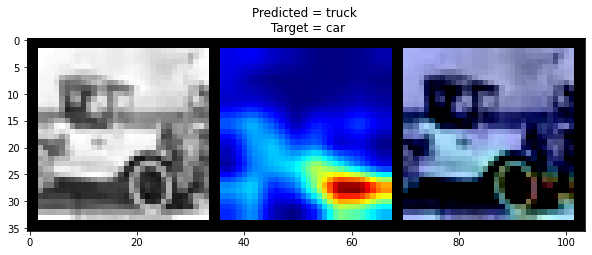

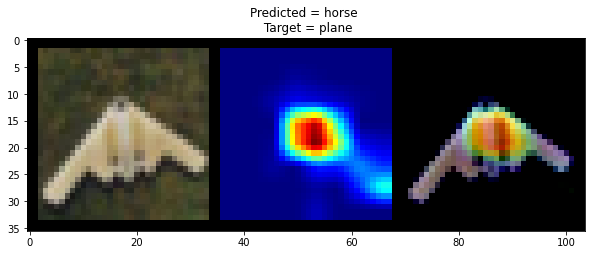

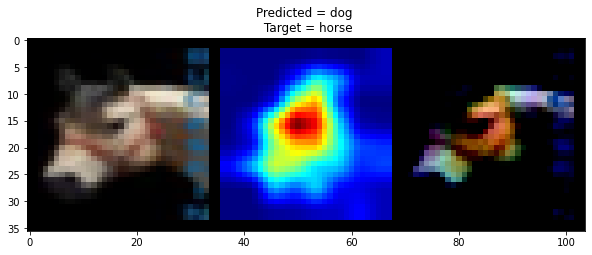

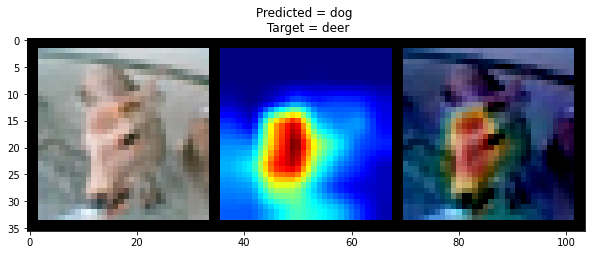

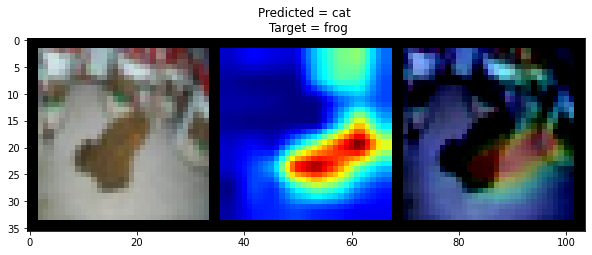

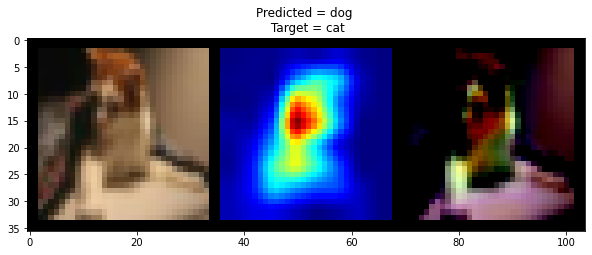

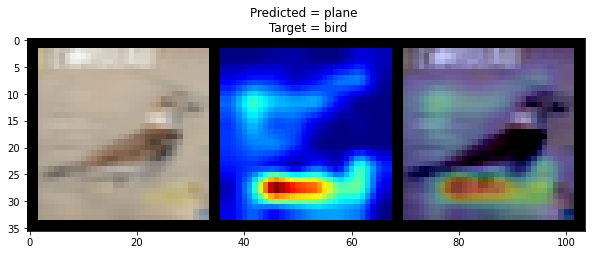

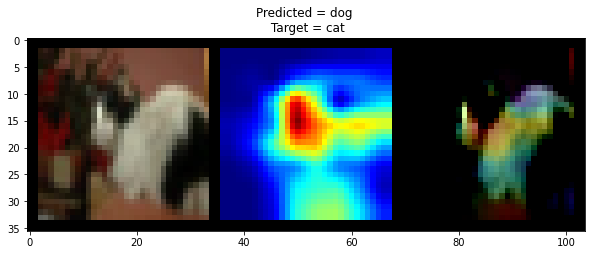

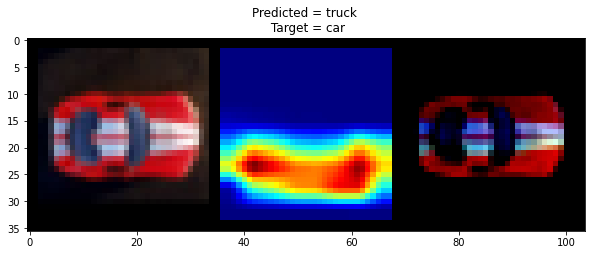

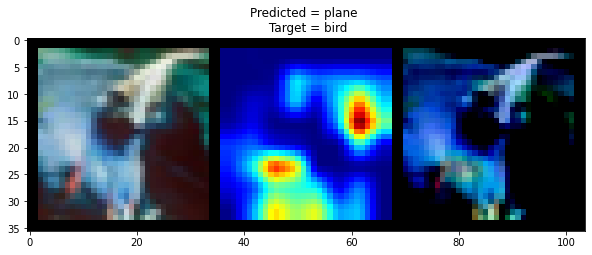

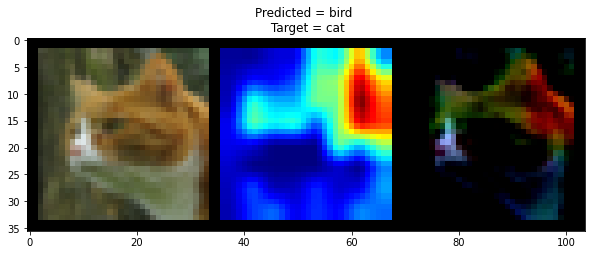

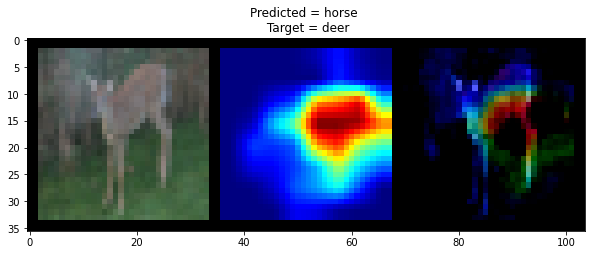

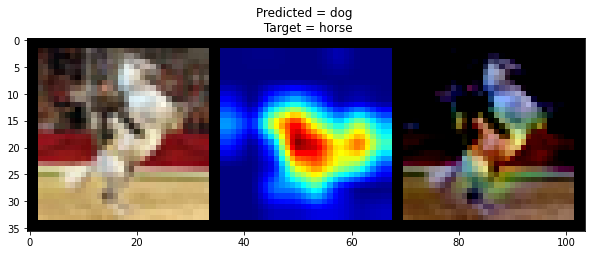

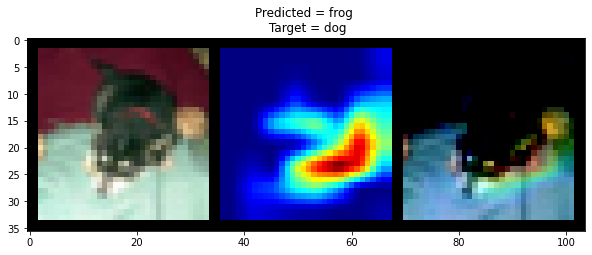

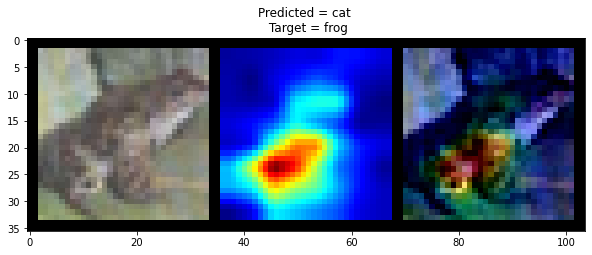

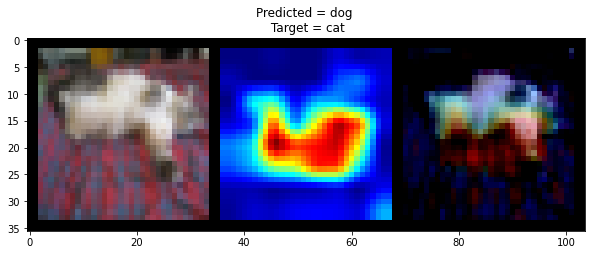

In [8]:
grad_cam_plot(resnet_model, target_classes, list_of_misclassified_images)